In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, auc

In [81]:
data = pd.read_csv("C:/Users/annie/OneDrive/Escritorio/Ejercicios/regresion/Regresion_framingham.csv",sep=",")

In [82]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [83]:
nulos = data.isna().sum()
print(nulos)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [84]:
data = data.fillna(data.mean())

In [85]:
nulos = data.isna().sum()
print(nulos)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


<Axes: >

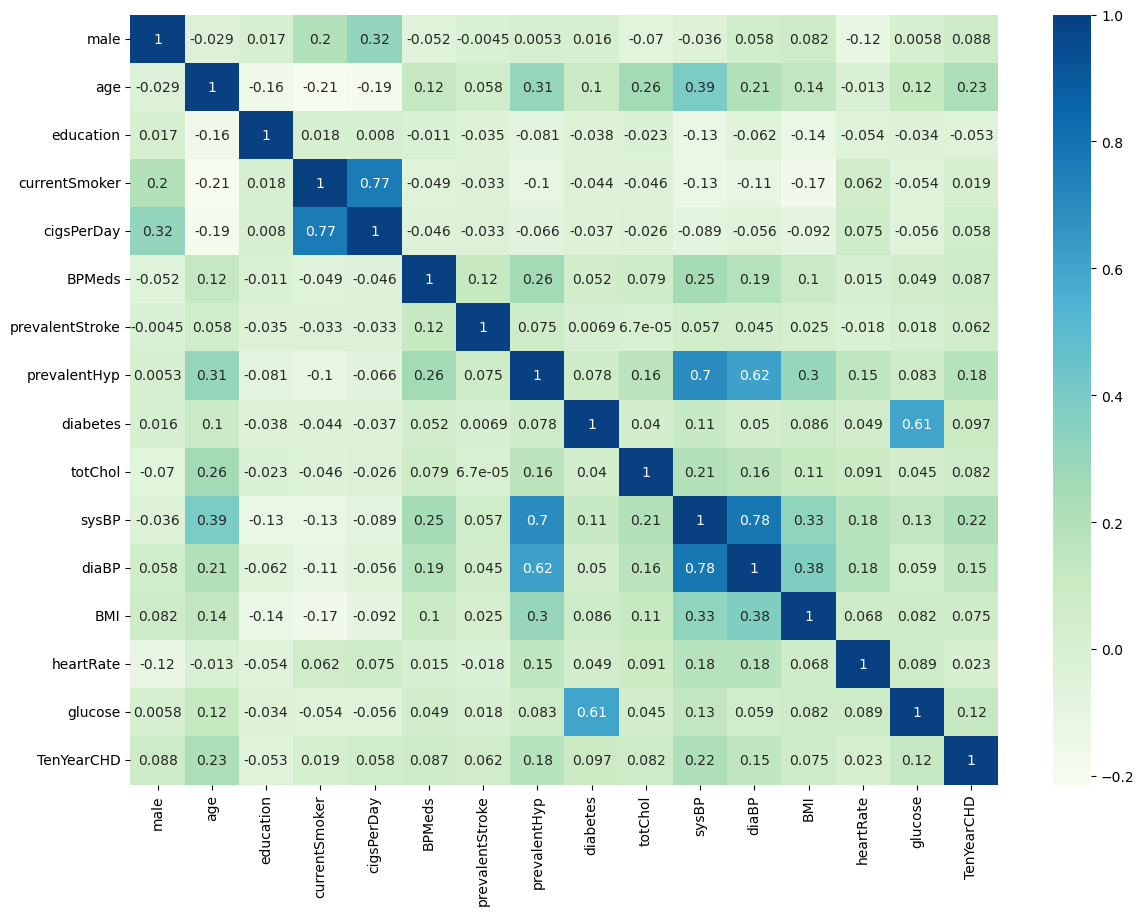

In [86]:
macorrr = data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(mcor, annot= True, cmap='GnBu')

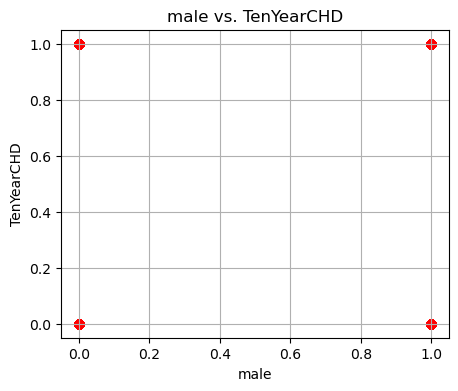

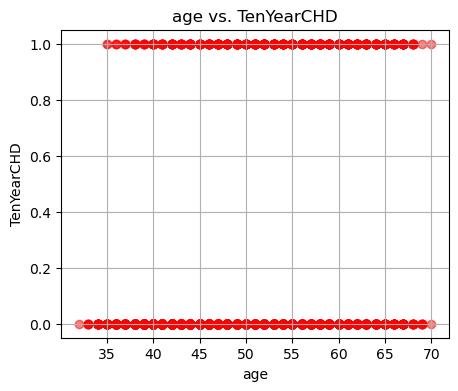

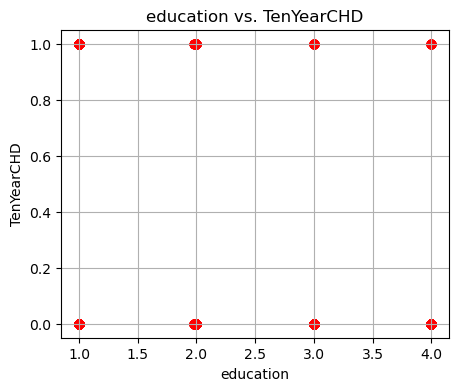

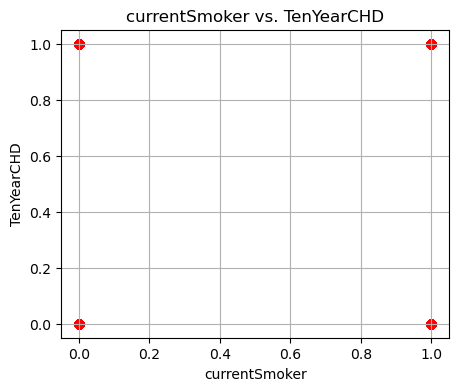

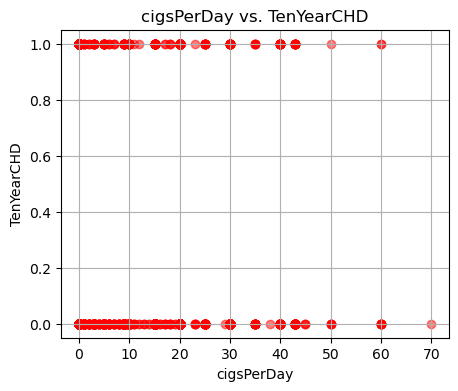

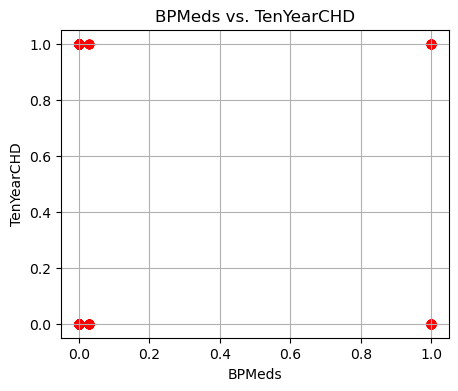

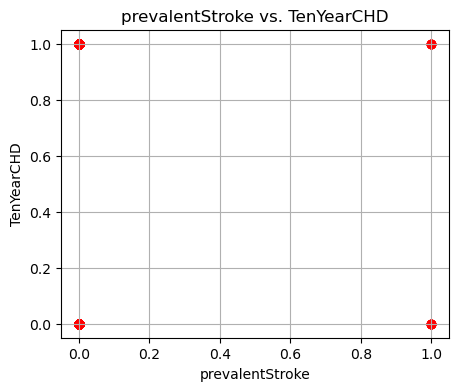

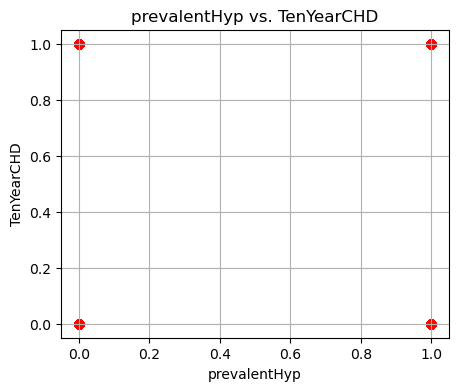

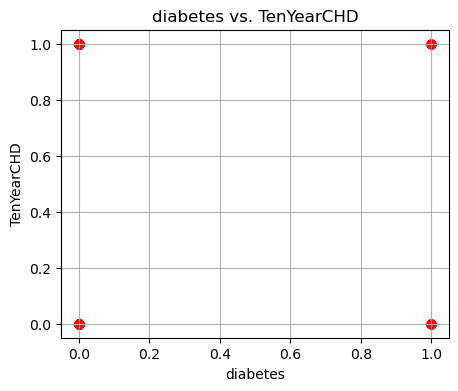

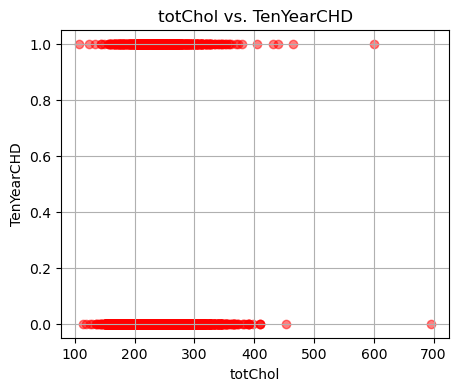

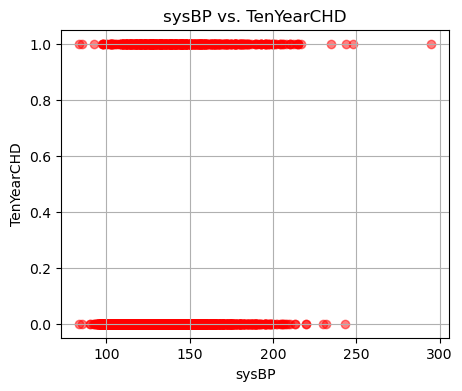

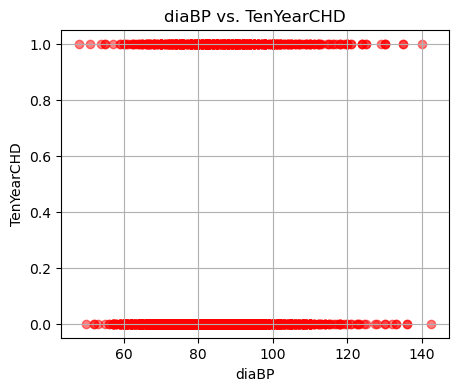

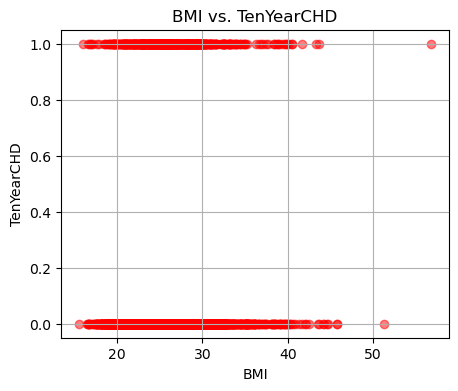

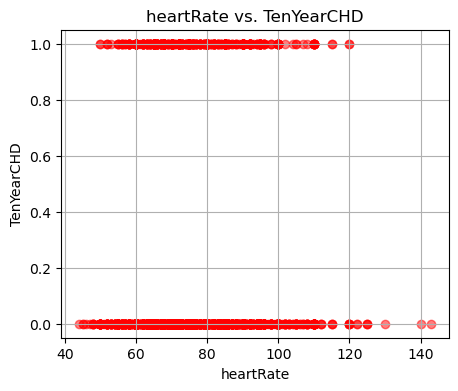

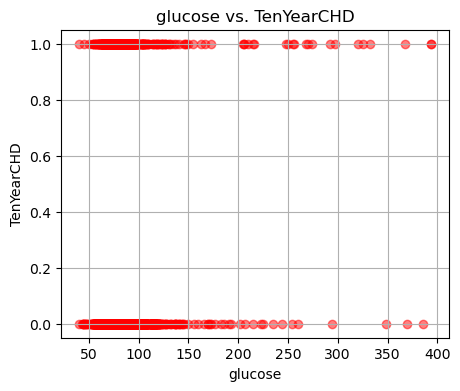

In [87]:
variables_independientes = data.columns.drop('TenYearCHD')

for variable in variables_independientes:
    plt.figure(figsize=(5, 4)) 
    plt.scatter(data[variable], data['TenYearCHD'], alpha=0.5, color="red") 
    plt.xlabel(variable)  
    plt.ylabel('TenYearCHD') 
    plt.title(f'{variable} vs. TenYearCHD') 
    plt.grid(True) 
    plt.show()

In [88]:
variables_utiles = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

data_finales = data[variables_utiles].copy()

data_finales.head(12)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,43,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,63,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,45,20.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,52,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,43,30.0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [89]:
x = data_finales.drop('TenYearCHD',axis=1)
y = data_finales['TenYearCHD']

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y, random_state= 0)

In [91]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[-0.99761577,  0.50347739,  0.68260604, ...,  0.18743196,
         0.67385837, -0.89424528],
       [ 0.86422369, -0.7555742 , -1.89278063, ...,  1.27590309,
        -1.07722554,  0.28923062],
       [ 1.09695363, -0.7555742 , -0.25389821, ...,  0.63707128,
        -1.49415029,  0.28923062],
       ...,
       [-0.41579094, -0.7555742 , -0.09000996, ..., -1.62586756,
        -1.32738039,  0.0051964 ],
       [-0.76488583, -0.7555742 ,  0.12070349, ...,  1.52406468,
        -1.07722554,  0.05253544],
       [-1.2303457 , -0.7555742 , -0.20707299, ...,  0.22674469,
         1.5910928 , -1.03626239]])

In [92]:
reglog = LogisticRegression(random_state = 0)
reglog.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [93]:
prediccion = reglog.predict (x_test)
prediccion

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
m_conf = confusion_matrix (y_test, prediccion)
m_conf

array([[1068,   11],
       [ 181,   12]], dtype=int64)

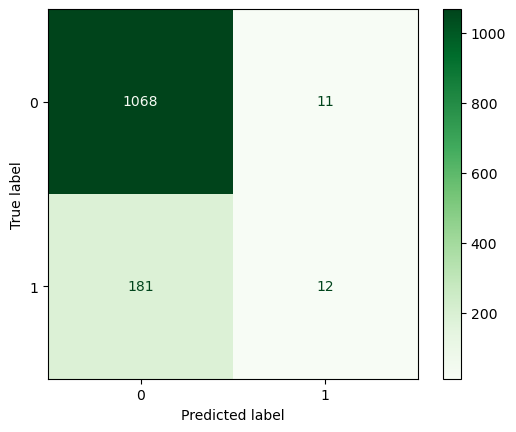

In [95]:
disp = ConfusionMatrixDisplay(m_conf)
disp.plot(cmap='Greens', values_format='d', colorbar=True)
plt.show()

In [96]:
accuracy=accuracy_score(y_test, prediccion)
precision=precision_score(y_test,prediccion)

print(f'Exactitud: {accuracy * 100:.2f}%')
print(f'Precisión: {precision * 100:.2f}%')

Exactitud: 84.91%
Precisión: 52.17%


In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


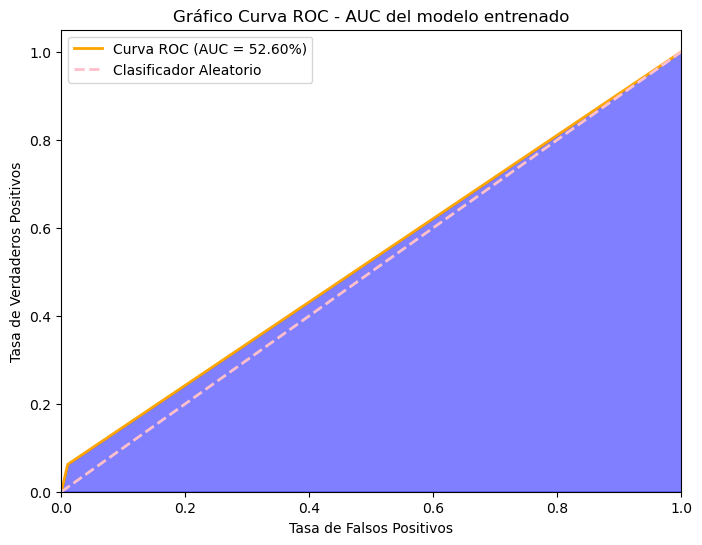

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, prediccion)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'Curva ROC (AUC = {roc_auc*100:.2f}%)')
plt.plot([0, 1], [0, 1], color='pink', lw=2, label=f'Clasificador Aleatorio', linestyle='--')
plt.fill_between(fpr, tpr, color='blue', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Gráfico Curva ROC - AUC del modelo entrenado')
plt.legend(loc='upper left')
plt.show()